In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("DIP3E_Original_Images_CH03/Fig0316(2)(2nd_from_top).tif", 0)
plt.imshow(image, cmap = "gray")
print(image.shape)
print(image.size)

(500, 500)
250000


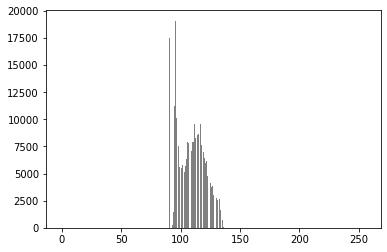

In [2]:
def Hist(img):
    row, col = img.shape
    y = np.zeros((256), np.uint64)
    for i in range(0, row):
        for j in range(0, col):
            y[img[i, j]]+=1
    x = np.arange(0, 256)
    plt.bar(x,y, color= "gray", align = "center")
    plt.show()
    return y
y = Hist(image)


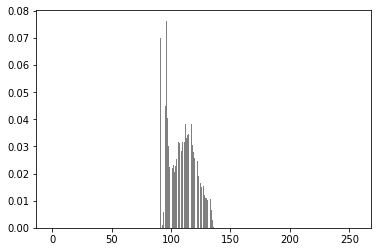

In [3]:
y_n = y/image.size
x = np.arange(0,256)
plt.bar(x,y_n,color="gray",align="center")
plt.show()

HISTOGRAM STRETCHING

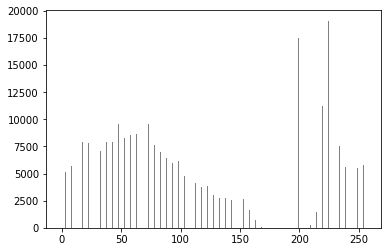

In [4]:
# stretching transformation
constant = 255/(image.max()-image.min())
img_str = image*int(constant)
b = Hist(img_str)

HISTOGRAM EQUALIZATION

In [5]:
def Hist_norm(im):
    m , n = im.shape
    h = np.zeros((256), np.uint64)
    for i in range(m):
        for j in range(n):
            h[im[i, j]]+=1
    return h/(m*n)
def cum_sum(h):
    return [sum(h[:i+1]) for i in range(len(h))]

def histeql(im):
    h = Hist_norm(im)  #calculate histogram
    cdf = np.array(cum_sum(h))
    sk = np.uint8(255*cdf) #(L-1)*cdf
    s1, s2 = im.shape
    Y = np.zeros_like(im)
    
    for i in range(0, s1):
        for j in range(0, s2):
            Y[i, j] = sk[im[i, j]]
    H = Hist_norm(Y)
    return Y, h, H, sk

Y, h, H, sk = histeql(image)

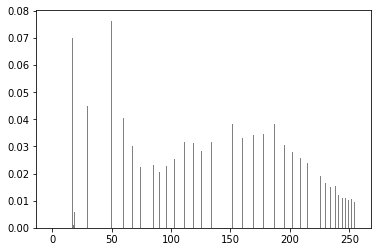

In [6]:
x = np.arange(0, 256)
plt.bar(x, H, color = "gray", align = "center")
plt.show()